In [17]:
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

In [18]:
def solution(A, b, t, number_iter, tol):
    n = A.shape[0]
    x = np.zeros(n)
    norm = []
    
    for i in range(number_iter):
        norm.append(np.linalg.norm(A @ x - b, 2))
        if norm[i] >= tol:
            x = x - t*(A @ x - b)
        else:
            break
    return x, norm

In [19]:
n = 3
A = np.random.rand(n,n)
A = np.tril(A) + np.tril(A, -1).T
while (np.linalg.eigvals(A) <= 0).any(): 
    A = np.random.rand(n,n)
    A = np.tril(A) + np.tril(A, -1).T
b = np.random.rand(n)
print("A = ")
print(A)
print("b = ")
print(b)

A = 
[[0.92677549 0.21222167 0.47963287]
 [0.21222167 0.25044647 0.20296642]
 [0.47963287 0.20296642 0.62098522]]
b = 
[0.39754079 0.73631199 0.40598725]


In [20]:
circle = [] # круги Гершгорина
for i in range(n):
    circle.append(np.sum(np.abs(A[i,:])) - A[i,i])
max_own = np.array(circle) + np.trace(A) # массив максимальных собственных значений
min_own = -np.array(circle) + np.trace(A) #массив  минимальных собственных значений
print(min_own, max_own)
own = np.linalg.eigvals(A)
print(own)

[1.10635263 1.38301908 1.11560788] [2.49006173 2.21339528 2.48080648]
[1.35416558 0.28313622 0.16090538]


In [25]:
t = np.random.rand() * 2 / np.max(max_own)
x, tol_1 = solution(A, b, t, 10**6, 10**-9)
print(np.linalg.norm(x - np.linalg.solve(A, b), 2))

5.848904432234878e-09


In [26]:
t = 2 / (np.max(max_own) + np.min(min_own)) 
x, tol_2 = solution(A, b, t, 10 ** 6, 10 ** -9)
print(np.linalg.norm(x - np.linalg.solve(A, b), 2))

6.153513684298167e-09


In [27]:
t = 2 / (np.max(own) + np.min(own)) 
x, tol_3 = solution(A, b, t, 10 ** 6, 10 ** -9)
print(np.linalg.norm(x - np.linalg.solve(A, b), 2))

3.0602829810345533e-09


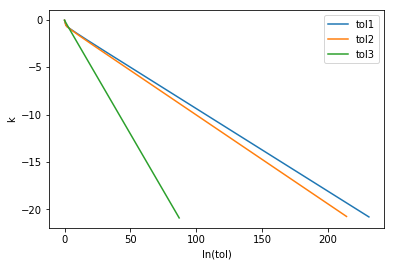

In [28]:
plt.plot(list(range(len(tol_1))), np.log(tol_1))
plt.plot(list(range(len(tol_2))), np.log(tol_2))
plt.plot(list(range(len(tol_3))), np.log(tol_3))
plt.xlabel('ln(tol)')
plt.ylabel('k')
plt.legend(["tol1", "tol2", "tol3"])
plt.show()